
# Logistic Regression Project

In this project we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file.**

In [2]:
df= pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55868.450080,180.000100,0.481000,0.50000
std,15.853615,8.785562,26295.327717,43.902339,0.499889,0.50025
min,32.600000,19.000000,1000.540000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47117.162500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57023.600000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65497.567500,218.792500,1.000000,1.00000
max,91.430000,61.000000,713841.570000,269.960000,1.000000,1.00000


In [5]:
df.shape

(1000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


## Exploratory Data Analysis

Let's use seaborn to explore the data-

Creating a histogram of the Age

Text(0.5, 0, 'Age')

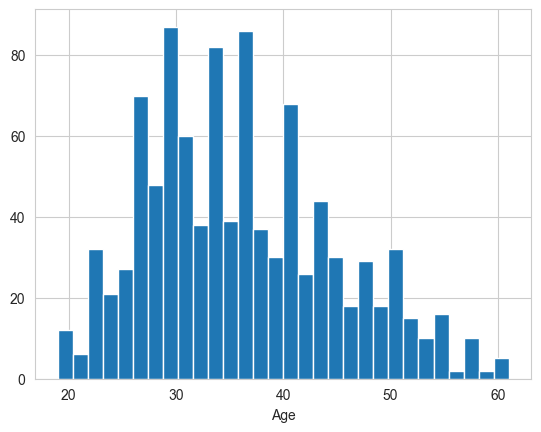

In [7]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

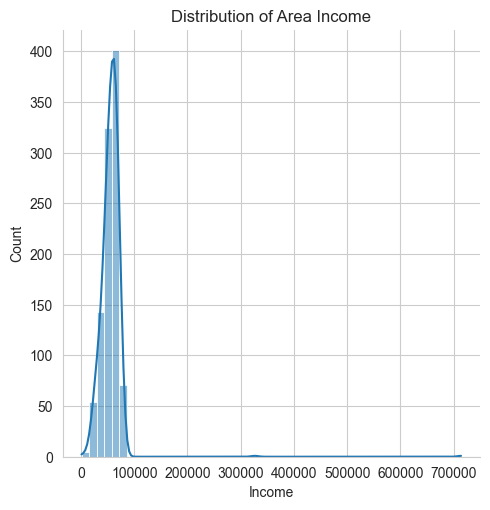

In [8]:
sns.set_style('whitegrid')
sns.displot(df['Area Income'], bins=50, kde=True)
plt.xlabel('Income')
plt.title('Distribution of Area Income')
plt.show()

**Creating a jointplot showing Area Income versus Age.**

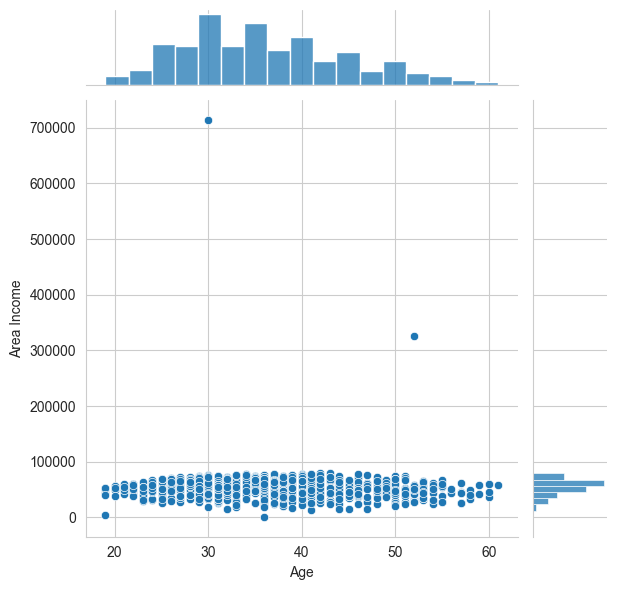

In [9]:
sns.jointplot(x='Age',y='Area Income', data=df)

### Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage

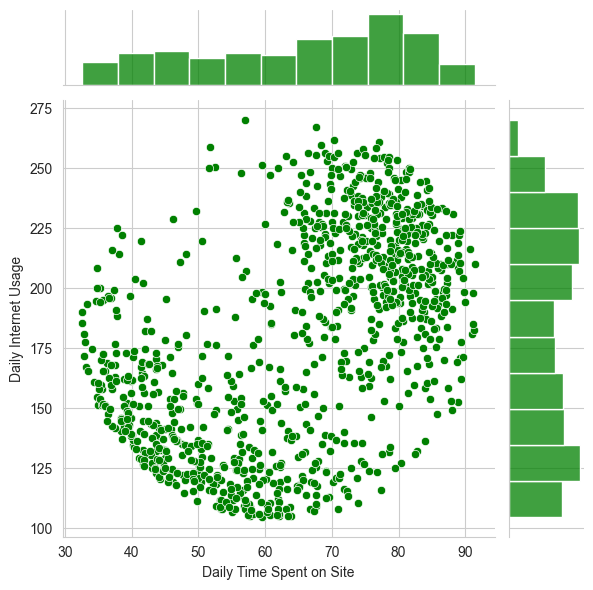

In [10]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='green')

** Finally, creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

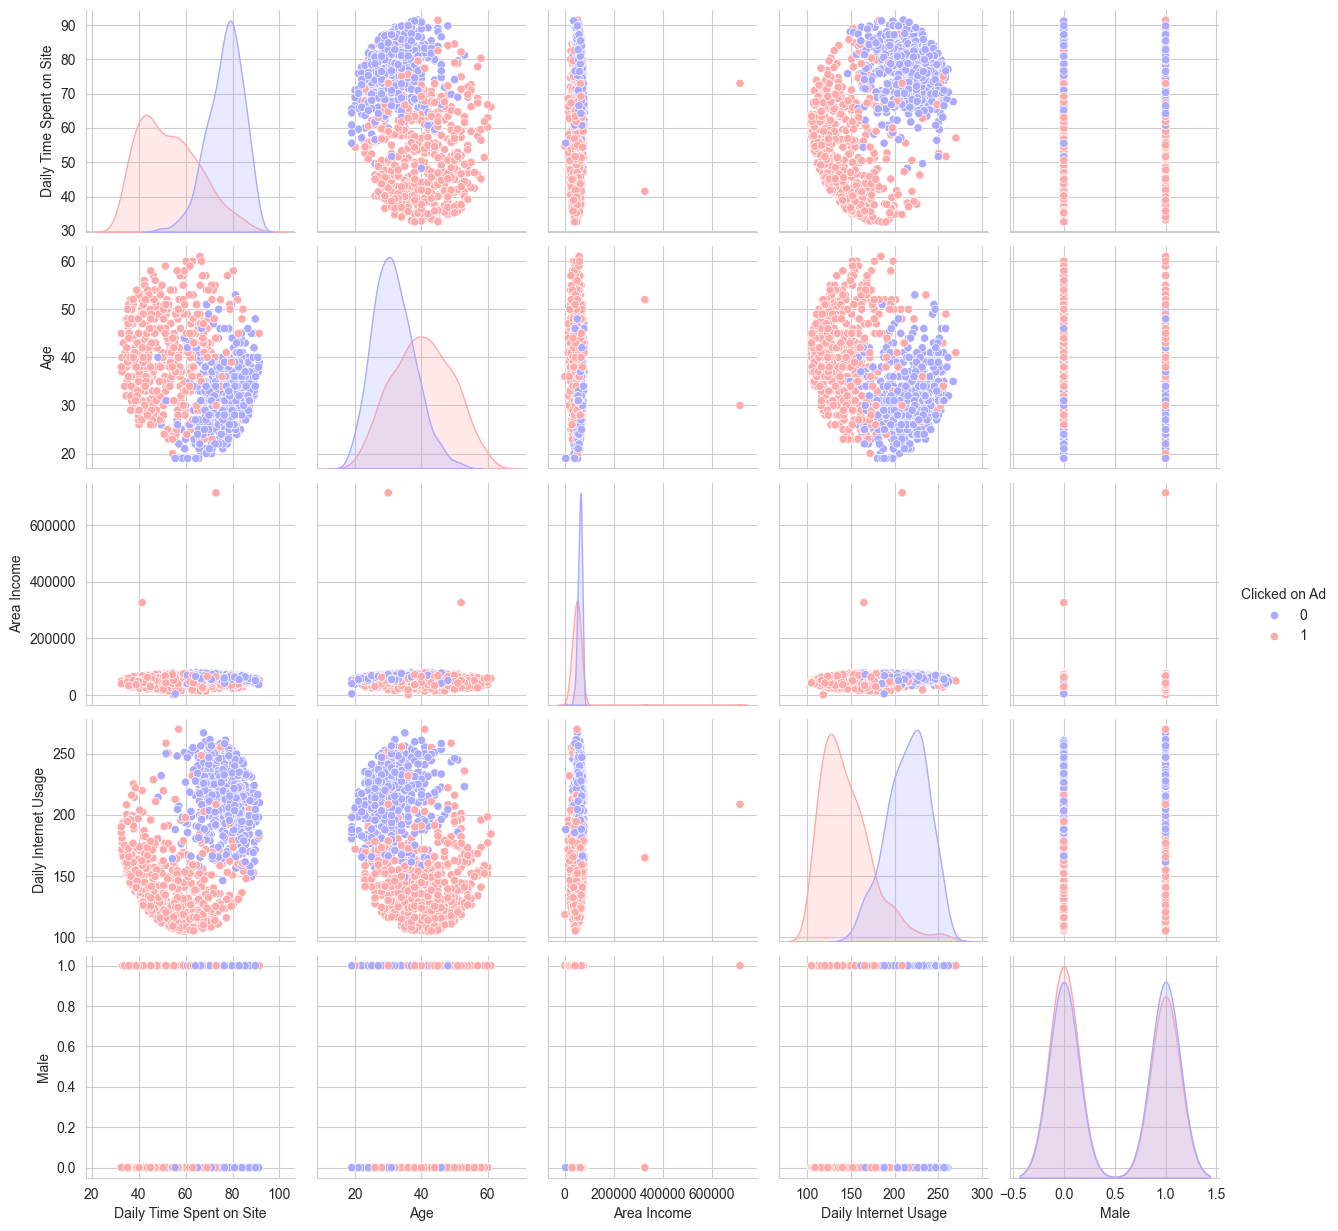

In [11]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

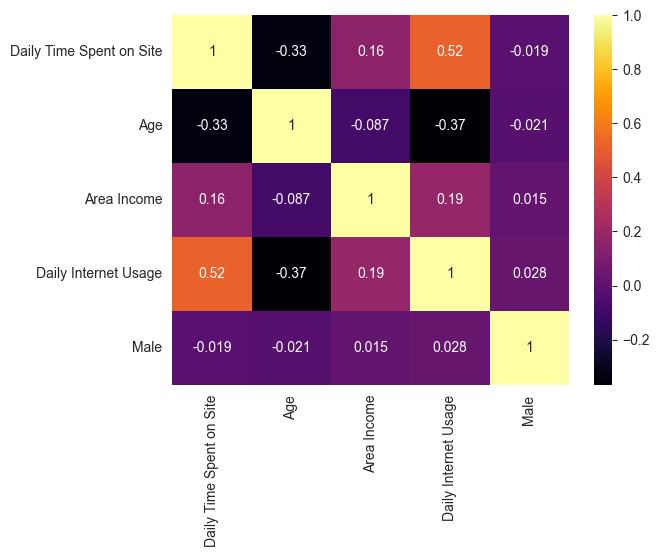

In [12]:
df_num = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]
corr = df[df_num].corr()

sns.heatmap(corr, annot=True, cmap="inferno")
plt.show()

# Outliers detection and Treatment

In [13]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0


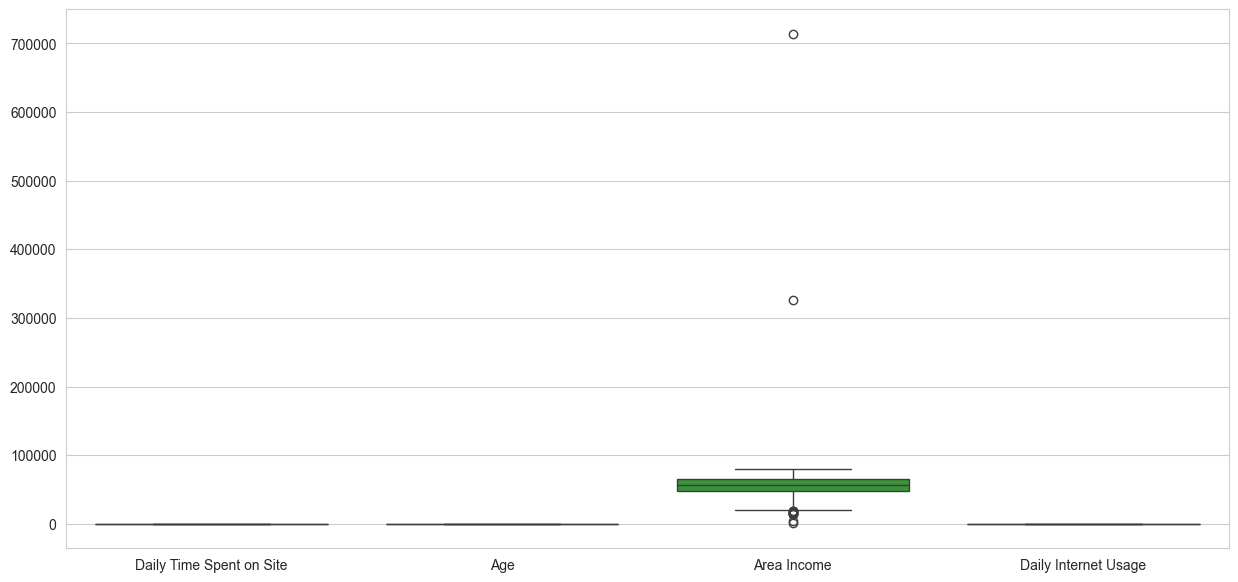

In [14]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']])
plt.show()

##### We have outliers in Area Income and the distribution of it is skewed.
###### we will be using IQR outliers mitigation technique using capping 

In [15]:
Q3 = df["Area Income"].quantile(0.75)
Q1 = df["Area Income"].quantile(0.25)
IQR = Q3-Q1
print(IQR )

18380.405


In [16]:
upper_limit = Q3 +1.5*IQR
lower_limit = Q1- 1.5*IQR

In [17]:
print("Upper Limit is = ", upper_limit ,  "\nLower limit is = ", lower_limit)

Upper Limit is =  93068.17499999999 
Lower limit is =  19546.555


In [18]:
# we are capping using np.where()

df["Area Income"] = np.where(df["Area Income"]> upper_limit, upper_limit, np.where(df["Area Income"]<lower_limit,lower_limit,df["Area Income"]))

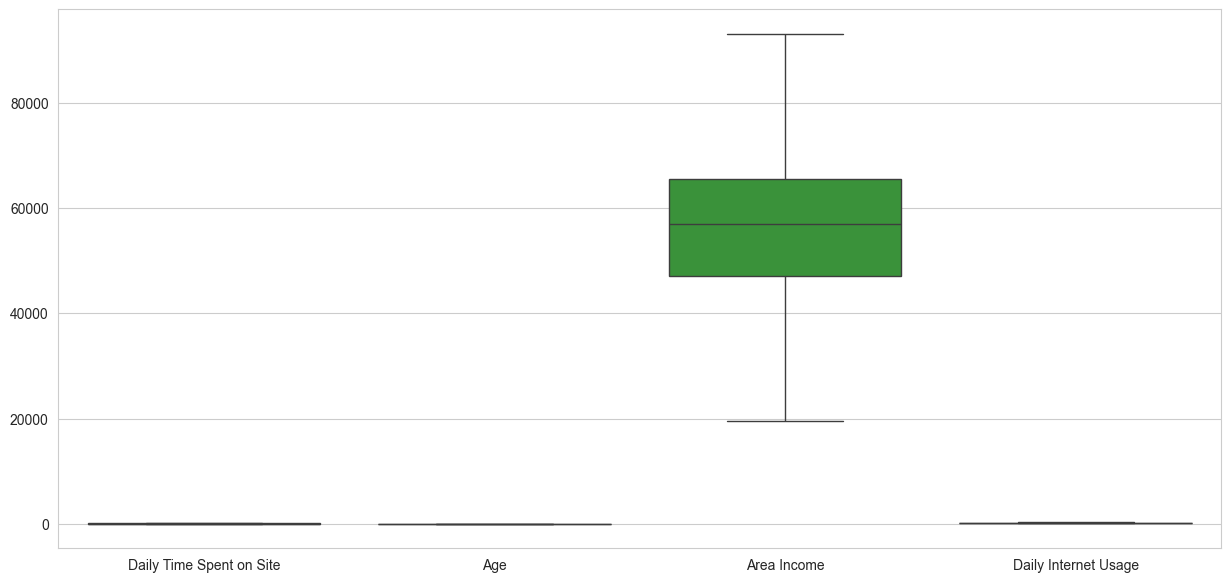

In [19]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']])
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


# Logistic Regression

Now it's time to do a train test split, and train our model!


**Splitting the data into training set and testing set using train_test_split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X =df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Training and fitting a logistic regression model on the training set.**

In [24]:
from sklearn.linear_model import LogisticRegression as LR


In [25]:
lr = LR(max_iter= 500)

In [26]:
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [27]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

**Creating a classification report for the model.**

In [28]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)
print("Accuracy on test set:", lr.score(X_test, y_test))


Intercept: [29.71414325]
Coefficients: [[-1.92121372e-01  1.68192212e-01 -1.49207530e-04 -7.13949577e-02
  -6.89826485e-01]]
Accuracy on test set: 0.9666666666666667


In [29]:
## Cross Validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=20, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation accuracy scores: [1.   1.   0.96 0.96 0.96 0.98 0.92 0.98 1.   1.   0.98 0.98 0.98 0.98
 0.92 0.94 0.94 1.   0.96 0.94]
Mean accuracy: 0.9690000000000001
Standard deviation: 0.025670995305986877
